# College Retention Data

In [1]:
#code123
#imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt

# Phase 1: My question
    How can I build a machine learning model to predict student retainment?

In [2]:
institution_details = pd.read_csv('../data/cc_institution_details.csv', encoding='latin1')
institution_details = institution_details.drop(
    ['med_sat_value', 'med_sat_percentile', 'long_x', 
     'lat_y', 'site', 'unitid', 'city',
     'nicknames', 'similar'], axis=1)
#institution_details.info()
institution_details.drop(
    columns=institution_details.columns[[0, 1, 9, 10, 12, 13, 14, 16, 17, 19, 21, 23, 25, 27, 29, 31] + list(range(32, 52))], inplace=True
)
institution_details.head()

,level,control,basic,hbcu,flagship,student_count,awards_per_value,exp_award_value,ft_pct,aid_value,endow_value,grad_100_value,grad_150_value,pell_value,retain_value,ft_fac_value,cohort_size
0,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,4051,14.2,105331,93.8,7142.0,NaN,10.0,29.1,71.2,63.1,82.8,882.0
1,4-year,Public,Research Universities--very high research acti...,NaN,NaN,11502,20.9,136546,72.7,6088.0,24136.0,29.4,53.5,35.1,80.2,92.4,1376.0
2,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,322,29.9,58414,62.7,2540.0,302.0,0.0,66.7,68.4,37.5,67.2,3.0
3,4-year,Public,Research Universities--very high research acti...,NaN,NaN,5696,20.9,64418,74.4,6647.0,11502.0,16.5,48.4,32.8,81.0,65.5,759.0
4,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,5356,11.6,132407,91.0,7256.0,13202.0,8.8,25.2,82.7,62.2,67.0,1351.0


In [3]:
institution_details['hbcu']= [1 if institution_details['hbcu'][i]=='X' else 0 for i in range(len(institution_details['hbcu']))]
institution_details['hbcu'] = institution_details.hbcu.astype('category')
institution_details['flagship']= [1 if institution_details['flagship'][i]=='X' else 0 for i in range(len(institution_details['hbcu']))]
institution_details['flagship'] = institution_details.flagship.astype('category')
institution_details['level'] = institution_details.level.astype('category')
institution_details['control'] = institution_details.control.astype('category')
institution_details['basic'] = institution_details.basic.astype('category')
institution_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   level             3798 non-null   category
 1   control           3798 non-null   category
 2   basic             3798 non-null   category
 3   hbcu              3798 non-null   category
 4   flagship          3798 non-null   category
 5   student_count     3798 non-null   int64   
 6   awards_per_value  3798 non-null   float64 
 7   exp_award_value   3798 non-null   int64   
 8   ft_pct            3794 non-null   float64 
 9   aid_value         3797 non-null   float64 
 10  endow_value       2323 non-null   float64 
 11  grad_100_value    3467 non-null   float64 
 12  grad_150_value    3467 non-null   float64 
 13  pell_value        3797 non-null   float64 
 14  retain_value      3535 non-null   float64 
 15  ft_fac_value      3785 non-null   float64 
 16  cohort_size       3467 n

/Users/Luke/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


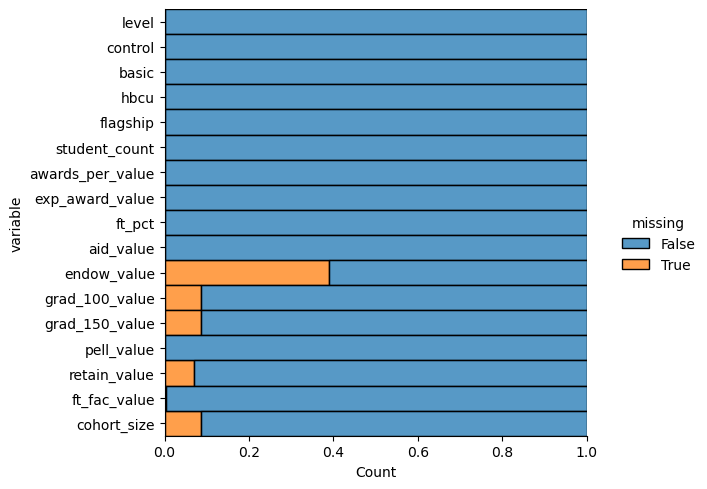

In [4]:
import seaborn as sns
sns.displot(
    data=institution_details.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

/Users/Luke/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


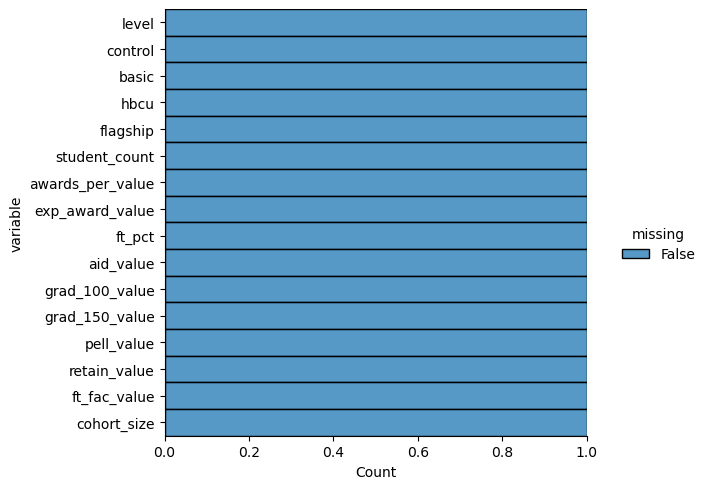

In [5]:
institution_details2 = institution_details.drop(['endow_value'], axis=1)
institution_details2.dropna(axis = 0, how = 'any', inplace = True)
sns.displot(
    data=institution_details2.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

In [6]:
retainment_standardizing = StandardScaler().fit_transform(institution_details2[['retain_value']])
retainment_standardizing[:10]

array([[-0.22508225],
       [ 0.84412891],
       [-1.82577264],
       [ 0.89415049],
       [-0.28135652],
       [ 1.2693123 ],
       [-1.50063241],
       [-0.21882955],
       [ 1.42562972],
       [ 0.85663431]])

In [7]:
retainment_normalizing = MinMaxScaler().fit_transform(institution_details2[['retain_value']])
retainment_normalizing[:10]

array([[0.631],
       [0.802],
       [0.375],
       [0.81 ],
       [0.622],
       [0.87 ],
       [0.427],
       [0.632],
       [0.895],
       [0.804]])

<Axes: ylabel='Density'>

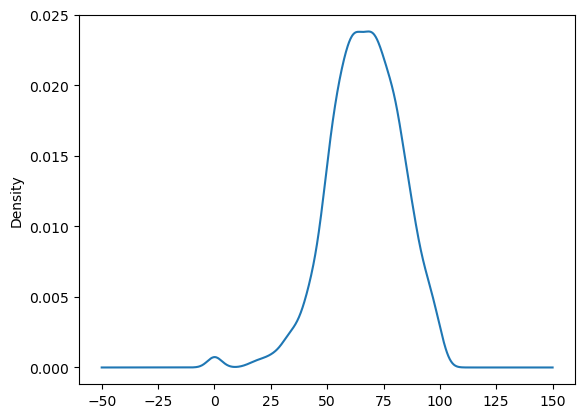

In [8]:
institution_details2.retain_value.plot.density()

<Axes: ylabel='Density'>

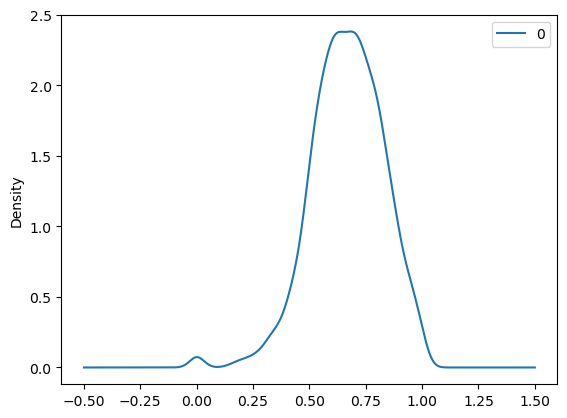

In [9]:
pd.DataFrame(retainment_normalizing).plot.density()

In [10]:
numbers_listing = list(institution_details2.select_dtypes('number')) #select function to find the numeric variables and create a list  

institution_details2[numbers_listing] = MinMaxScaler().fit_transform(institution_details2[numbers_listing])
institution_details2

,level,control,basic,hbcu,flagship,student_count,awards_per_value,exp_award_value,ft_pct,aid_value,grad_100_value,grad_150_value,pell_value,retain_value,ft_fac_value,cohort_size
0,4-year,Public,Masters Colleges and Universities--larger prog...,1,0,0.023677,0.104900,0.019941,0.935551,0.165867,0.100,0.291,0.712,0.631,0.828,0.054289
1,4-year,Public,Research Universities--very high research acti...,0,0,0.067476,0.156202,0.025851,0.716216,0.140338,0.294,0.535,0.351,0.802,0.924,0.084730
2,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,0,0,0.001758,0.225115,0.011059,0.612266,0.054401,0.000,0.667,0.684,0.375,0.672,0.000123
3,4-year,Public,Research Universities--very high research acti...,0,0,0.033347,0.156202,0.012196,0.733888,0.153878,0.165,0.484,0.328,0.810,0.655,0.046709
4,4-year,Public,Masters Colleges and Universities--larger prog...,1,0,0.031348,0.084992,0.025067,0.906445,0.168629,0.088,0.252,0.827,0.622,0.670,0.083190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3792,2-year,Public,Tribal Colleges,0,0,0.000488,0.054364,0.023993,0.588358,0.106961,0.000,0.000,0.744,0.333,0.286,0.000185
3793,4-year,Private not-for-profit,Not applicable- not in Carnegie universe,0,0,0.000511,0.196784,0.004553,0.319127,0.110594,0.000,0.000,0.263,0.333,0.107,0.000678
3794,4-year,Private not-for-profit,Not applicable- not in Carnegie universe,0,0,0.000688,0.123277,0.020061,0.917879,0.220438,0.515,0.515,0.283,0.744,0.444,0.001972
3795,4-year,Private for-profit,Not applicable- not in Carnegie universe,0,0,0.002733,0.418070,0.010022,0.553015,0.072591,0.375,0.375,0.531,0.778,0.296,0.000431


In [11]:
category_list = list(institution_details2.select_dtypes('category'))
retainment_one_hot = pd.get_dummies(institution_details2, columns = category_list, dtype=int) 
retainment_one_hot

,student_count,awards_per_value,exp_award_value,ft_pct,aid_value,grad_100_value,grad_150_value,pell_value,retain_value,ft_fac_value,...,basic_Schools of art- music- and design,basic_Schools of business and management,basic_Schools of engineering,basic_Schools of law,basic_Theological seminaries- Bible colleges- and other faith-related institutions,basic_Tribal Colleges,hbcu_0,hbcu_1,flagship_0,flagship_1
0,0.023677,0.104900,0.019941,0.935551,0.165867,0.100,0.291,0.712,0.631,0.828,...,0,0,0,0,0,0,0,1,1,0
1,0.067476,0.156202,0.025851,0.716216,0.140338,0.294,0.535,0.351,0.802,0.924,...,0,0,0,0,0,0,1,0,1,0
2,0.001758,0.225115,0.011059,0.612266,0.054401,0.000,0.667,0.684,0.375,0.672,...,0,0,0,0,0,0,1,0,1,0
3,0.033347,0.156202,0.012196,0.733888,0.153878,0.165,0.484,0.328,0.810,0.655,...,0,0,0,0,0,0,1,0,1,0
4,0.031348,0.084992,0.025067,0.906445,0.168629,0.088,0.252,0.827,0.622,0.670,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3792,0.000488,0.054364,0.023993,0.588358,0.106961,0.000,0.000,0.744,0.333,0.286,...,0,0,0,0,0,1,1,0,1,0
3793,0.000511,0.196784,0.004553,0.319127,0.110594,0.000,0.000,0.263,0.333,0.107,...,0,0,0,0,0,0,1,0,1,0
3794,0.000688,0.123277,0.020061,0.917879,0.220438,0.515,0.515,0.283,0.744,0.444,...,0,0,0,0,0,0,1,0,1,0
3795,0.002733,0.418070,0.010022,0.553015,0.072591,0.375,0.375,0.531,0.778,0.296,...,0,0,0,0,0,0,1,0,1,0


count    3371.000000
mean        0.666998
std         0.159955
min         0.000000
25%         0.564000
50%         0.671000
75%         0.781000
max         1.000000
Name: retain_value, dtype: float64

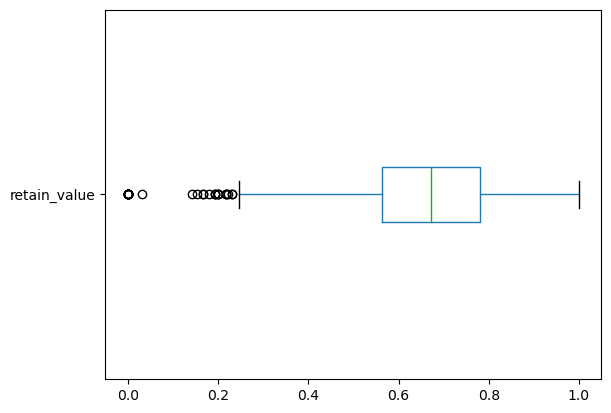

In [12]:
retainment_one_hot.boxplot(column= 'retain_value', vert= False, grid=False)
retainment_one_hot.retain_value.describe()

In [13]:
retainment_one_hot['retain_value_f'] = pd.cut(retainment_one_hot.retain_value, bins = [-1,0.781,1], labels =[0,1])
prevalence = retainment_one_hot.retain_value_f.value_counts()[1]/len(retainment_one_hot.retain_value_f)
prevalence

0.2491842183328389

In [14]:
new_retainment = retainment_one_hot.drop(['retain_value'],axis=1)

In [15]:
Train, Test = train_test_split(new_retainment,  train_size = .8, stratify = new_retainment.retain_value_f)
print(Train.shape)
print(Test.shape) 

(2696, 53)
(675, 53)


In [16]:
Tune, Test = train_test_split(Test,  train_size = .5, stratify= Test.retain_value_f)
print(Train.retain_value_f.value_counts())
print(672/(672+2024))

retain_value_f
0    2024
1     672
Name: count, dtype: int64
0.24925816023738873


In [17]:
print(Tune.retain_value_f.value_counts())
print(126/(380+126))

retain_value_f
0    253
1     84
Name: count, dtype: int64
0.2490118577075099


In [18]:
print(Test.retain_value_f.value_counts())
print(413/(413+1245))

retain_value_f
0    254
1     84
Name: count, dtype: int64
0.24909529553679133


# Phase 3:
    My instincts tell me that my sets are very close to equivalent but not exactly equivalent. I am hopeful that this won't have a large impact on my model. I think my target will address my problem.

# Building a kNN model to predict student retainment

In [19]:
prevalence = retainment_one_hot.retain_value_f.value_counts()[1]/len(retainment_one_hot.retain_value_f)
prevalence

0.2491842183328389

In [20]:
train, test = train_test_split(retainment_one_hot,  test_size=0.4, stratify = retainment_one_hot['retain_value_f'])
test, val = train_test_split(test, test_size=0.5, stratify= test['retain_value_f']) 

In [21]:
import random
random.seed(1984)   # kNN is a random algorithm, so we use `random.seed(x)` to make results repeatable

X_train = train.drop(['retain_value_f'], axis=1).values
y_train = train['retain_value_f'].values

neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [22]:
X_test = test.drop(['retain_value_f'], axis=1).values
y_test = test['retain_value_f'].values

neigh.score(X_test, y_test)

0.8976261127596439

In [23]:
X_val = val.drop(['retain_value_f'], axis=1).values
y_val = val['retain_value_f'].values

neigh.score(X_val, y_val)

0.8933333333333333

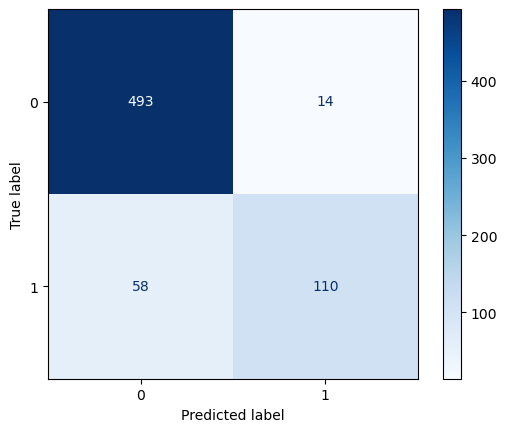

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(neigh, X_val, y_val, cmap = 'Blues') 
plt.show()

Our confusion matrix at the default threshhold is doing an okay job. It is correctly placing the true negatives and only made a few errors regarding false positives. However, it is not doing a good job of predicting true positives and false negatives. This is a problem because we want to be able to predict students who will not retain so that we can intervene and help them. We are not doing a good job of this. Adjusting the threshhold to minimize false negatives will help us to better predict students who will not retain.

In [25]:
from sklearn.metrics import classification_report

y_val_pred = neigh.predict(X_val)
print(classification_report(y_val_pred, y_val))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       551
           1       0.65      0.89      0.75       124

    accuracy                           0.89       675
   macro avg       0.81      0.89      0.84       675
weighted avg       0.91      0.89      0.90       675



In [26]:
sensitivity = 109/(109+59)   # = TP/(TP+FN)
specificity = 485/(485+22)   # = TN/(TN+FP)
print(sensitivity, specificity)

0.6488095238095238 0.9566074950690335


In [27]:
def chooseK(k, X_train, y_train, X_test, y_test):
    random.seed(1)
    print("calculating... ", k, "k")    # I'll include this so you can see the progress of the function as it runs
    class_knn = KNeighborsClassifier(n_neighbors=k)
    class_knn.fit(X_train, y_train)
    
    # calculate accuracy
    accu = class_knn.score(X_test, y_test)
    return accu

In [28]:
test = pd.DataFrame({'k':list(range(1,22,2)), 
                     'accu':[chooseK(x, X_train, y_train, X_test, y_test) for x in list(range(1, 22, 2))]})

calculating...  1 k
calculating...  3 k
calculating...  5 k
calculating...  7 k
calculating...  9 k
calculating...  11 k
calculating...  13 k
calculating...  15 k
calculating...  17 k
calculating...  19 k
calculating...  21 k


In [29]:
test

,k,accu
0,1,0.891691
1,3,0.915430
2,5,0.913947
3,7,0.905045
4,9,0.897626
5,11,0.906528
6,13,0.893175
7,15,0.897626
8,17,0.891691
9,19,0.896142


In [30]:
test = test.sort_values(by=['accu'], ascending=False)
test

,k,accu
1,3,0.915430
2,5,0.913947
5,11,0.906528
3,7,0.905045
4,9,0.897626
7,15,0.897626
9,19,0.896142
6,13,0.893175
0,1,0.891691
8,17,0.891691


It seems like 3 might be our ideal number for k!

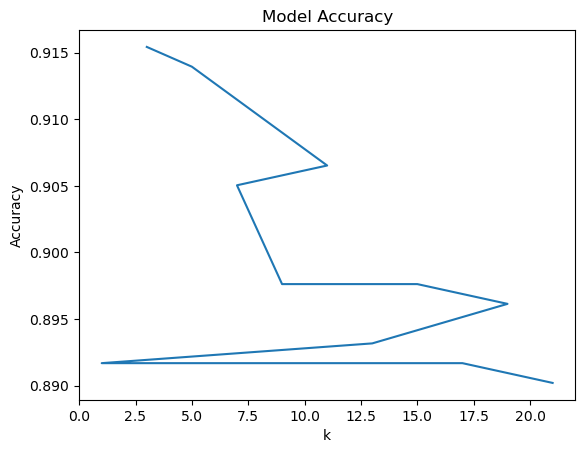

In [32]:
plt.plot(test['k'], test['accu'])
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

In [33]:
test_probs = neigh.predict_proba(X_test)
test_preds = neigh.predict(X_test)

In [34]:
test_probabilities = pd.DataFrame(test_probs, columns = ['not_retained_prob', 'retained_prob'])
test_probabilities

,not_retained_prob,retained_prob
0,1.000000,0.000000
1,1.000000,0.000000
2,1.000000,0.000000
3,1.000000,0.000000
4,0.000000,1.000000
...,...,...
669,0.888889,0.111111
670,1.000000,0.000000
671,1.000000,0.000000
672,1.000000,0.000000


In [35]:
final_model = pd.DataFrame({'actual_class': y_test.tolist(),
                           'pred_class': test_preds.tolist(),
                           'pred_prob': [test_probabilities['retained_prob'][i] if test_preds[i]==1 else test_probabilities['not_retained_prob'][i] for i in range(len(test_preds))]})

In [36]:
final_model.head()

,actual_class,pred_class,pred_prob
0,0,0,1.0
1,0,0,1.0
2,0,0,1.0
3,0,0,1.0
4,1,1,1.0


In [37]:
final_model['pos_pred'] = [final_model.pred_prob[i] if final_model.pred_class[i]==1 else 1-final_model.pred_prob[i] for i in range(len(final_model.pred_class))]

In [38]:
final_model.head()

,actual_class,pred_class,pred_prob,pos_pred
0,0,0,1.0,0.0
1,0,0,1.0,0.0
2,0,0,1.0,0.0
3,0,0,1.0,0.0
4,1,1,1.0,1.0


In [39]:
final_model.actual_class = final_model.actual_class.astype('category')
final_model.pred_class = final_model.pred_class.astype('category')

/Users/Luke/anaconda3/envs/sklearn-env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


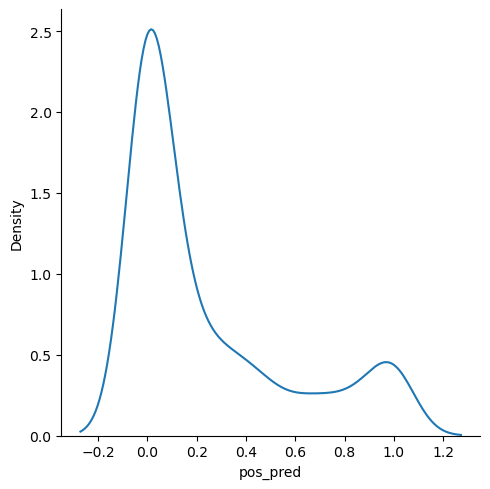

In [40]:
import seaborn as sns

sns.displot(final_model, x="pos_pred", kind="kde")

In [41]:
final_model.pos_pred.value_counts()

pos_pred
0.000000    338
0.111111     83
1.000000     55
0.222222     46
0.333333     41
0.444444     33
0.888889     23
0.666667     21
0.777778     18
0.555556     16
Name: count, dtype: int64

In [42]:
from sklearn.metrics import confusion_matrix

def adjust_thres(x, y, z):
    """
    x=pred_probabilities
    y=threshold
    z=tune_outcome
    """
    thres = pd.DataFrame({'new_preds': [1 if i > y else 0 for i in x]})
    thres.new_preds = thres.new_preds.astype('category')
    con_mat = confusion_matrix(z, thres)  
    print(con_mat)

In [43]:
confusion_matrix(final_model.actual_class, final_model.pred_class) 

array([[489,  17],
       [ 52, 116]])

In [63]:
adjust_thres(final_model.pos_pred, .4, final_model.actual_class)

[[476  30]
 [ 32 136]]


I think I want my final threshold to be around .4 because .4 minimizes both the false positives and false negatives.

In [64]:
adjust_thres(final_model.pos_pred, .3, final_model.actual_class)

[[446  60]
 [ 21 147]]


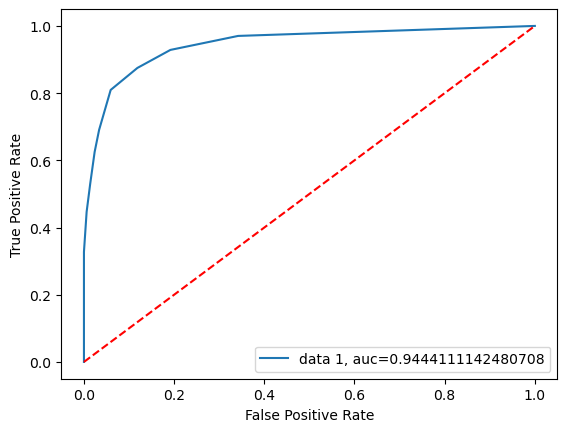

In [65]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_test, final_model.pos_pred)
auc = metrics.roc_auc_score(y_test, final_model.pos_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

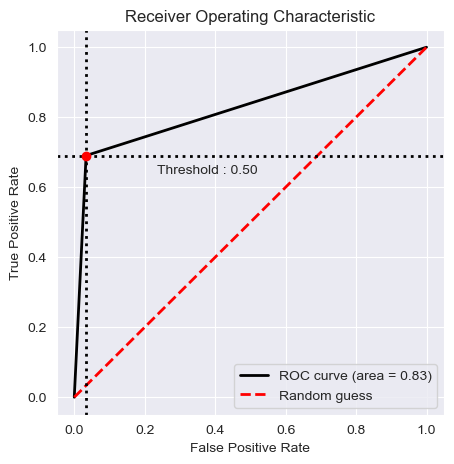

In [66]:
from plot_metric.functions import BinaryClassification

# Visualisation with plot_metric
bc = BinaryClassification(y_test, final_model.pred_class, labels=["0", "1"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()